#

In [1]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 유튜브_순위.csv to 유튜브_순위.csv


In [82]:
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   카테고리    1000 non-null   object
 1   채널명     1000 non-null   object
 2   구독자수    1000 non-null   object
 3   조회수     1000 non-null   object
 4   비디오수    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


,카테고리,채널명,구독자수,조회수,비디오수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [83]:
df['구독자수2'] = df['구독자수'].apply(lambda x : int(x.replace(',', '')))
df['비디오수2'] = df['비디오수'].apply(lambda x : int(x.replace(',', '')))
df['조회수2'] = df.조회수.apply(lambda x : int(x.replace(',', '')))

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   카테고리    1000 non-null   object
 1   채널명     1000 non-null   object
 2   구독자수    1000 non-null   object
 3   조회수     1000 non-null   object
 4   비디오수    1000 non-null   object
 5   구독자수2   1000 non-null   int64 
 6   비디오수2   1000 non-null   int64 
 7   조회수2    1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


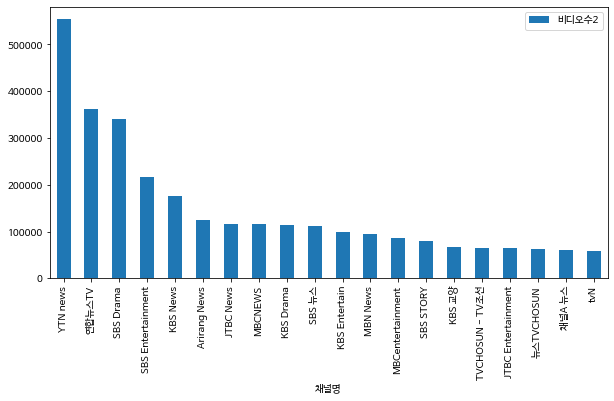

In [85]:
df[['채널명', '비디오수2']].sort_values(by='비디오수2', ascending=False).iloc[:20].plot.bar(x='채널명', y='비디오수2', rot=90, figsize=(10,5))
plt.show()

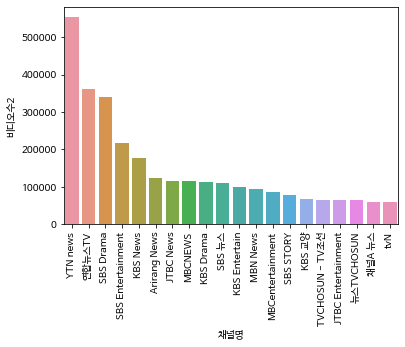

In [86]:
sns.barplot(x='채널명', y='비디오수2', data=df.sort_values(by='비디오수2', ascending=False).head(20))
plt.xticks(rotation=90)
plt.show()

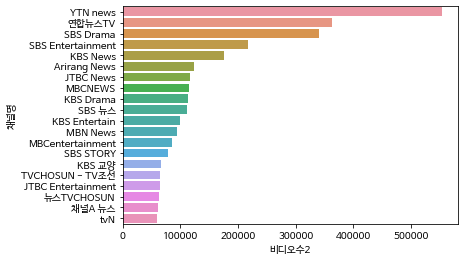

In [87]:
sns.barplot(y='채널명', x='비디오수2', data=df.sort_values(by='비디오수2', ascending=False).head(20))
plt.show()

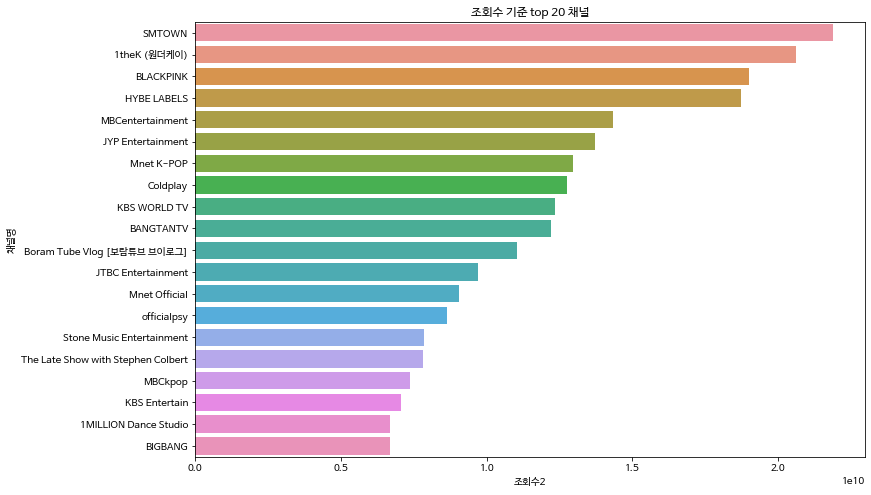

In [88]:
plt.figure(figsize=(12,8))
sns.barplot(x='조회수2', y='채널명', data=df.sort_values(by='조회수2', ascending=False).head(20))
plt.title('조회수 기준 top 20 채널')
plt.show()

- 카테고리 수 분포

In [90]:
df[['카테고리', '채널명']].groupby('카테고리').count()

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


In [96]:
df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum'])

구독자수2           
          count        sum
카테고리                      
BJ/인물/연예인    71   97560000
IT/기술/컴퓨터     8    7960000
TV/방송       146  229720000
게임           74   67170000
교육/강의        22   23420000
국내/해외/여행      4    3440000
뉴스/정치/사회     53   71020000
미분류         114  143340000
스포츠/운동        8   10840000
애완/반려동물      19   26890000
영화/만화/애니     33   34680000
음식/요리/레시피    85  180570000
음악/댄스/가수    171  674180000
자동차           2    1240000
주식/경제/부동산     8    7850000
취미            1     600000
취미/라이프       38   47890000
키즈/어린이       88  257740000
패션/미용        44   44370000
해외            6   12130000
회사/오피셜        5   11740000

-  카테고리별 구독자수 합계 시각화

In [ ]:
#  ('구독자수2',   'sum')
df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum'])

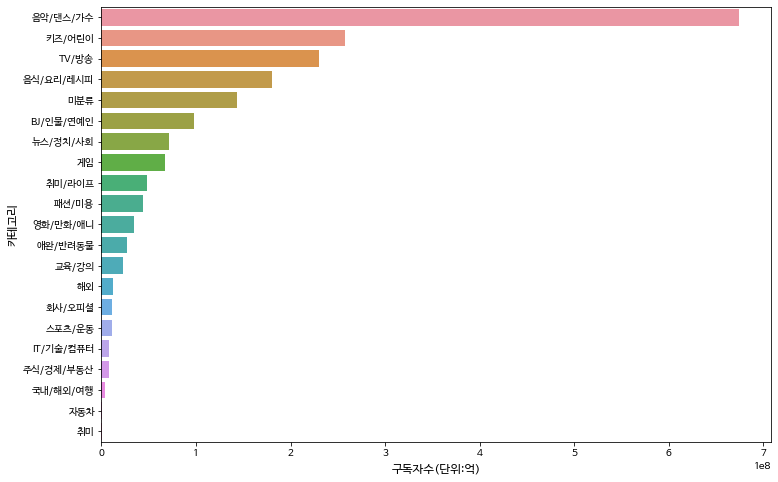

In [109]:
df_new = df[['카테고리', '구독자수2']].groupby('카테고리').agg(['count','sum']).reset_index().sort_values(by=('구독자수2',   'sum'), ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x= ('구독자수2',   'sum'), y='카테고리', data= df_new )
plt.xlabel('구독자수(단위:억)', size=12)
plt.ylabel('카테고리', size=12)
plt.show()